In [156]:
%matplotlib inline

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import urllib
import urllib2
import simplejson
import json
import string
netamount=lambda x: x['netamount']
opendate=lambda x: x['opendate']
jsonloadfun = lambda x: json.loads(x)
stocklist = pd.read_csv(r'./data/gn_xqzy.txt', header=None)
c1=stocklist[0].tolist()
ggzjl = r'http://vip.stock.finance.sina.com.cn/quotes_service/api/json_v2.php/MoneyFlow.ssl_qsfx_lscjfb?page=1&num=300&sort=opendate&asc=0&daima='

replacestr = lambda strbad: strbad.replace('{', '{\"').replace(':\"', '\":\"').replace(',', ',\"').replace('\"{', '{')
getdata = lambda stockid: urllib2.urlopen(urllib2.Request(ggzjl+str(stockid))).read()
tmpresult = map(getdata, c1)
mapedresult = map(replacestr,tmpresult)
jsonresult = map(jsonloadfun, mapedresult)
frame = pd.DataFrame(jsonresult)
frame.to_csv('jsonresult.csv')
s1 = frame.ix[0]
s1opendate = s1.apply(opendate)
s1.apply(netamount)
frame.applymap(opendate)
frame.applymap(netamount)
frame.index=c1
frame.columns=s1opendate
frame.index.names = ['stockid']
frame.columns.names = ['opendate']
frame1 = frame.applymap(netamount).applymap(string.atof).applymap(lambda x: x / 10 ** 9)
frame1.head()
frame2 = frame1.T

frame2.to_csv('frame2.csv')

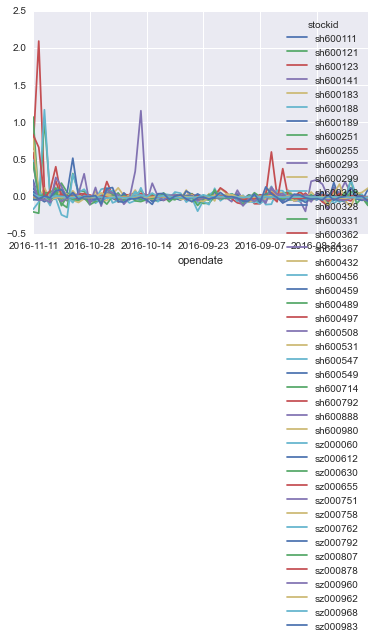

In [174]:
frame2.ix[:60].plot()

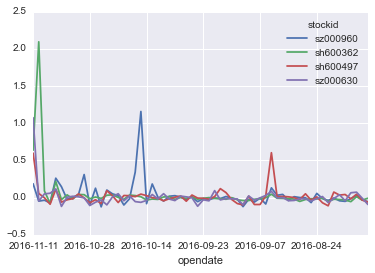

In [175]:
showlist = ['sz000960', 'sh600362', 'sh600497', 'sz000630']
frame2.ix[:60, showlist].plot()